In [2]:
import glob
from PIL import Image
import pillow_heif
import pandas as pd
import numpy as np

In [ ]:
'''
Plan
- get closest color to baseline yellow in image
- magic wand tool on that pixel to get rough outline
- Clean up selection
- Transform and crop
'''

In [ ]:
def color_dist(pix1, pix2):
    return np.abs(pix1 - pix2)

def magic_wand(image, start_r, start_c, start_pixel, range):
    visited = np.zeros(image.shape)
    selected = np.zeros(image.shape)
    
    def select(r, c, range):
        if visited[r][c]:
            return
        if color_dist(start_pixel, image[r][c]) < range:
            selected[r][c] = 1
        
        visited[r][c] = 1

        select(r-1, c, range)
        select(r+1, c, range)
        select(r, c-1, range)
        select(r, c+1, range)
    
    select(start_r, start_c, range)
    return selected


def find_closest_color(image, color):
    closest_dist = color_dist(image[0][0],color)
    closest_pixel = image[0][0]
    closest_r, closest_c = 0,0
    for r in image.shape[0]:
        for c in image.shape[1]:
            pixel = image[r][c]
            dist = color_dist(pixel, color)
            if dist < closest_dist:
                closest_dist = dist
                closest_pixel = pixel
                closest_r, closest_c = r,c
    return closest_r, closest_c, closest_pixel
            
            



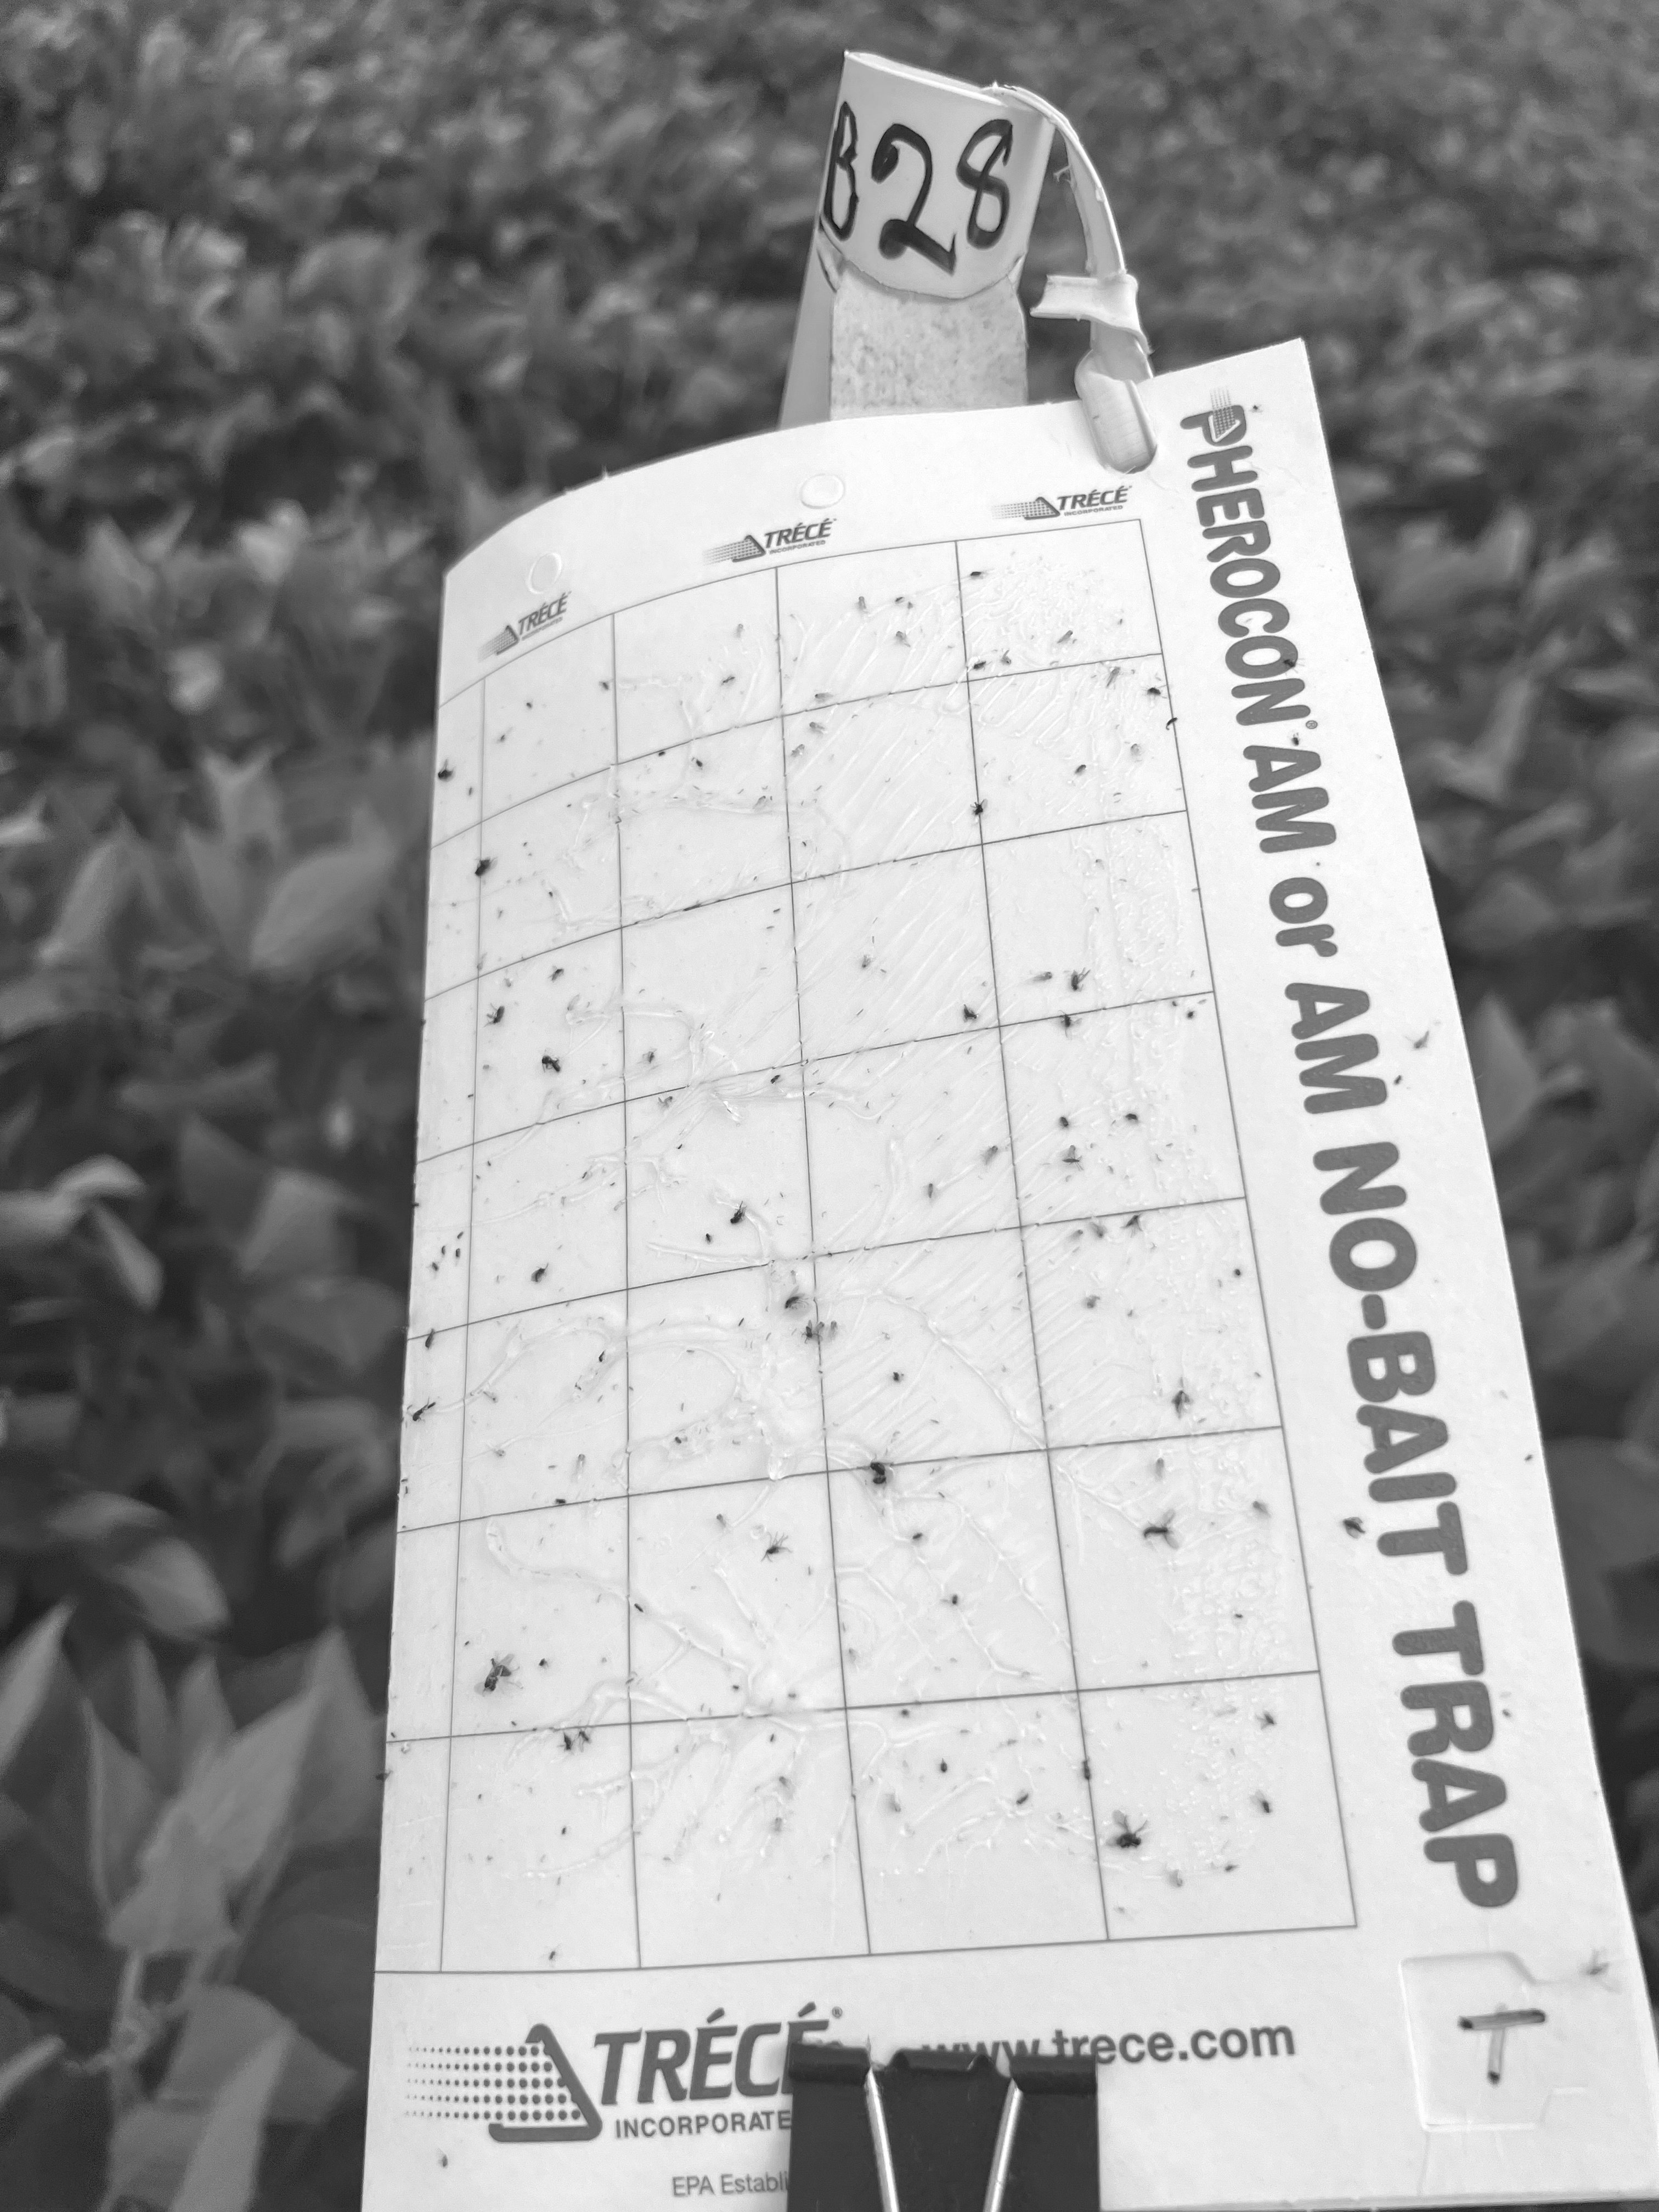

In [6]:
im = Image.open("B28_3AUGUST2022.jpeg")
im = im.convert('HSV')
h,s,v = im.split()
h_mask = h.point(lambda i: i > 50 and i < 100)
#h = h.point(lambda i: 255)
#s = s.point(lambda i: 255)
#v = v.point(lambda i: 255)

im2 = Image.merge(im.mode, (h,s,v))
im2_rgb = im2.convert('RGB')
v